# Assignment Model Selection

In [129]:
import numpy as np
import pandas as pd

# Loading dataset

In [131]:
titanic_data = pd.read_csv(r"C:\Users\sreeh\Downloads\titanic_dataset .csv")

In [130]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocessing steps

In [128]:
titanic_data.shape

(891, 12)

In [118]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [132]:
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [133]:
const='C180'
titanic['Cabin'].fillna(const,inplace=True)

In [134]:
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,C180,True,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,C180,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,C180,True,False,True


In [137]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [138]:
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [139]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [112]:
titanic.head()
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [142]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [143]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [144]:
from sklearn.preprocessing import StandardScaler #Feature Scaling

In [145]:
values=titanic_data[['Age','Fare']]
scaler=StandardScaler()
scaled=scaler.fit_transform(values)
scaled

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

# Training dataset and test dataset

In [147]:
x=titanic_data.drop(columns=['Survived','Name','Ticket','Cabin'])
y=titanic_data[['Survived']]

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

# KNN and SVM

In [153]:
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM

In [155]:
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [156]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix #for confusision matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [157]:
accuracy1=accuracy_score(y_test,y_pred1)
accuracy1

0.6278026905829597

In [158]:
report1=classification_report(y_pred1,y_test)
print(report1)

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       165
           1       0.37      0.59      0.45        58

    accuracy                           0.63       223
   macro avg       0.59      0.61      0.58       223
weighted avg       0.70      0.63      0.65       223



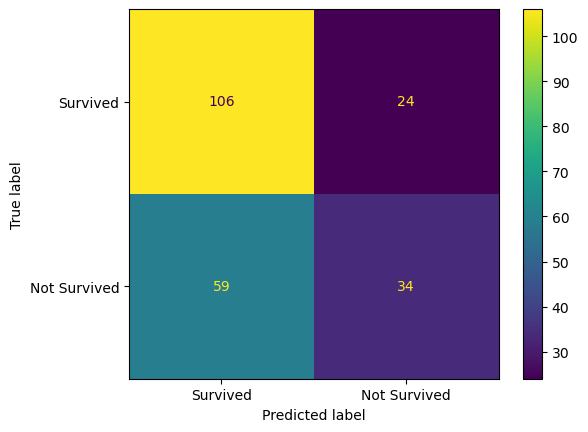

In [159]:
labels1=['Survived','Not Survived']
result1=confusion_matrix(y_test,y_pred1)
result1
cmd1=ConfusionMatrixDisplay(result1,display_labels=labels1)
cmd1.plot()

In [160]:
model2=SVC()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [161]:
accuracy2=accuracy_score(y_test,y_pred2)
accuracy2

0.6098654708520179

In [162]:
report2=classification_report(y_pred2,y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.98      0.60      0.75       213
           1       0.09      0.80      0.16        10

    accuracy                           0.61       223
   macro avg       0.54      0.70      0.45       223
weighted avg       0.94      0.61      0.72       223



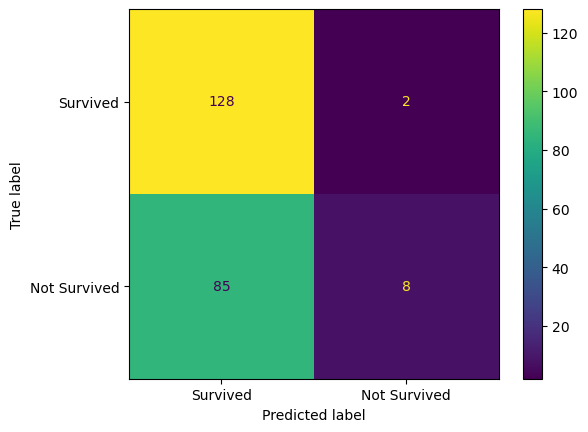

In [163]:
labels2=['Survived','Not Survived']
result2=confusion_matrix(y_test,y_pred2)
result2
cm2=ConfusionMatrixDisplay(result2,display_labels=labels2)
cm2.plot()

In [164]:
from sklearn.model_selection import KFold #kflod cross validation technique
kv=KFold(10)

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
score=cross_val_score(model1,x,y,cv=kv)
score

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.56666667, 0.52808989, 0.49438202, 0.58426966, 0.47191011,
       0.56179775, 0.71910112, 0.71910112, 0.68539326, 0.68539326])

In [167]:
score.mean()

0.6016104868913857

In [168]:
from sklearn.model_selection import StratifiedKFold # stratified Kfold validation
skfold=StratifiedKFold(n_splits=10)

In [170]:
cv_result=cross_val_score(model2,x,y,cv=skfold)
cv_result

C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreeh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([0.6       , 0.62921348, 0.65168539, 0.69662921, 0.65168539,
       0.66292135, 0.65168539, 0.68539326, 0.69662921, 0.62921348])

In [171]:
cv_result.mean()

0.655505617977528